In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import time
import nibabel as nib
import midastools.misc.nako
from midastools.visualization.brain import vis_brain_grid, vis_brain
import midastools.visualization.nora as nora
from midastools.misc.nako import brain
import shutil
import time

200326-19:55:48,684 nipype.utils INFO:
	 No new version available.


In [5]:
t1_data = Path('/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/')
ref_file = '/mnt/share/raheppt1/data/brain/NAKO/MNI/MNI152_T1_1mm.nii.gz'
robex_dir = '/home/raheppt1/ROBEX'

output_dir = Path('/home/raheppt1/tmp')
output_dir.joinpath('raw').mkdir(exist_ok=True)
output_dir.joinpath('n4').mkdir(exist_ok=True)
output_dir.joinpath('n4_flirt').mkdir(exist_ok=True)
output_dir.joinpath('n4_flirt_robex').mkdir(exist_ok=True)
output_dir.joinpath('n4_flirt_robex_fcm').mkdir(exist_ok=True)

## Orientation

In [4]:
# Check orientation
i = 0
for f in t1_data.glob('*.nii.gz'):
    img = nib.load(str(f))
    affine = img.affine
    axcodes = nib.aff2axcodes(affine)
    print(f)
    print(axcodes)
    i = i+1
    if i == 10:
        break

/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100003_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100004_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100005_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100006_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100007_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100008_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Defaced/100009_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
('L', 'A', 'S')
/mnt/data/rawdata/NAKO_195/NAKO-195_MRT-Dateien/T1_3D_SAG_MPR_Tra_Def

## Copy rawdata

In [6]:
# Copy samples to rawdata directory
i = 0
for f in t1_data.glob('*.nii.gz'):
    print(f)
    shutil.copy(f, output_dir.joinpath('raw', f.name))
    i = i+1
    if i == 10:
        break

/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100003_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100004_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100005_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100006_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100007_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100008_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100009_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100010_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/100011_30_T1_3D_SAG_MPR_Tr

## Bias field correction

In [7]:
print('(n4) bias field correction ...')
input_file  = next(output_dir.joinpath('raw').glob('*.nii.gz'))
n4_file = output_dir.joinpath('n4', input_file.name.replace('.nii.gz', '_n4.nii.gz'))

t = time.time()
brain.n4_bias_field_correction(input_file, n4_file)
elapsed_time = time.time() - t
print(f'elapsed time: {time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}')

(n4) bias field correction ...
elapsed time: 00:05:24


## FLIRT Registration

In [8]:
print('(fsl-flirt) mni template registration ...')

input_file = n4_file
n4_flirt_file = output_dir.joinpath('n4_flirt', input_file.name.replace('.nii.gz', '_flirt.nii.gz'))
n4_flirt_matrix = output_dir.joinpath('n4_flirt', input_file.name.replace('.nii.gz', '_flirt.mat'))

t = time.time()
brain.flirt_registration(input_file, n4_flirt_file, n4_flirt_matrix, ref_file, verbose=True)
elapsed_time = time.time() - t
print(f'elapsed time: {time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}')

(fsl-flirt) mni template registration ...
200326-20:02:38,847 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI
flirt -in /home/raheppt1/tmp/n4/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4.nii.gz -ref /mnt/share/raheppt1/data/brain/NAKO/MNI/MNI152_T1_1mm.nii.gz -out /home/raheppt1/tmp/n4_flirt/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4_flirt.nii.gz -omat /home/raheppt1/tmp/n4_flirt/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4_flirt.mat -bins 256 -searchcost mutualinfo
elapsed time: 00:01:19


## ROBEX Skull stripping

In [ ]:
print('(robex) skull stripping ...')

input_file = n4_flirt_file
n4_flirt_robex_file = output_dir.joinpath('n4_flirt_robex', 
                                              input_file.name.replace('.nii.gz', '_robex.nii.gz'))
n4_flirt_robex_mask = output_dir.joinpath('n4_flirt_robex', 
                                              input_file.name.replace('.nii.gz', '_robexmask.nii.gz'))

t = time.time()
brain.robex_skull_stripping(input_file, 
                            n4_flirt_robex_file,
                            n4_flirt_robex_mask,
                            robex_dir,
                            verbose=True)
elapsed_time = time.time() - t
print(f'elapsed time: {time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}')

## FCM Intensity normalization

In [ ]:
print('(fcm) intensity normalization')

input_file = n4_flirt_file
mask_file = n4_flirt_robex_mask

n4_flirt_fcmwmmask = str(output_dir.joinpath('n4_flirt_robex_fcm',
    input_file.name.replace('.nii.gz', '_fcmwmmask.nii.gz')))
n4_flirt_fcmnorm= str(output_dir.joinpath('n4_flirt_robex_fcm',
    input_file.name.replace('.nii.gz', '_fcmnorm.nii.gz')))

t = time.time()
brain.fcm_normalize(input_file, 
                    mask_file,
                    n4_flirt_fcmnorm,
                    n4_flirt_fcmwmmask)
elapsed_time = time.time() - t
print(f'elapsed time: {time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}')

## Visualization

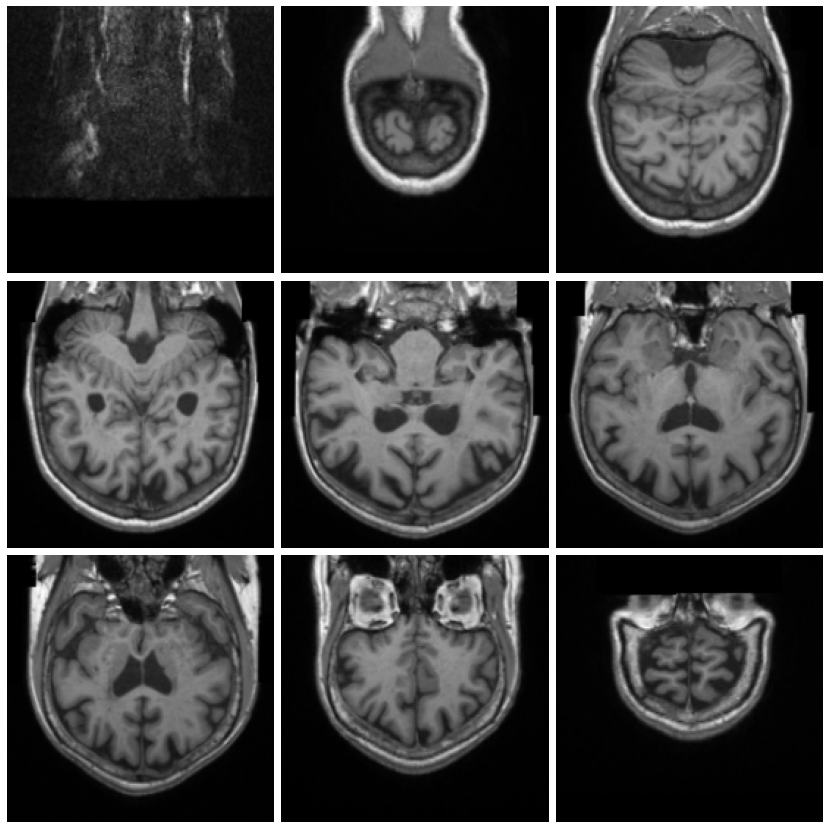

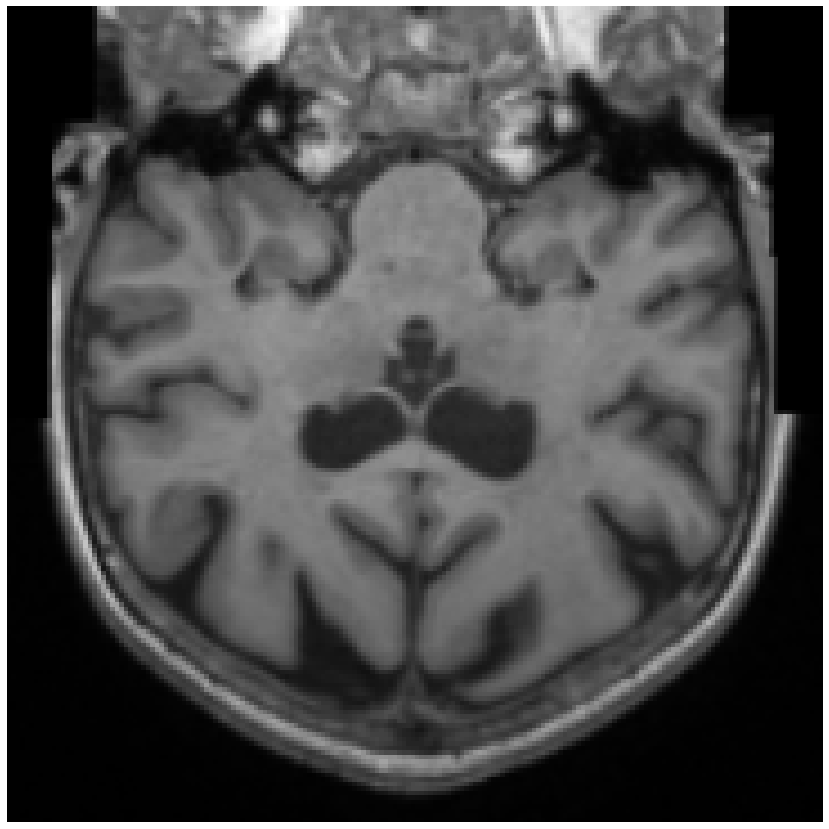

In [11]:
data = nib.load(str(n4_flirt_fcmnorm)).get_fdata()
vis_brain_grid(data, normalize=True)
vis_brain(data, slice_sel=100, axis_sel=1, figsize=(15,15))

In [14]:
for f in output_dir.glob('**/*.nii.gz'):
    nora.add_to_project(f)

b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'


## Pipeline

In [23]:
input_file  = next(output_dir.joinpath('raw').glob('*.nii.gz'))
output_dir = Path('/home/raheppt1/tmp2')
brain.process_brain_t1(input_file,
                       output_dir,
                       verbose=True)

(n4) bias field correction ...
(fsl-flirt) mni template registration ...
200326-16:45:49,843 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI
flirt -in /home/raheppt1/tmp2/n4_flirt/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4.nii.gz -ref /mnt/qdata/tools/fsl/ref/MNI152_T1_1mm.nii.gz -out /home/raheppt1/tmp2/n4_flirt/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4_flirt.nii.gz -omat /home/raheppt1/tmp2/n4_flirt/100003_30_T1_3D_SAG_MPR_Tra_Defaced_n4_flirt.mat -bins 640 -searchcost mutualinfo
(robex) skull stripping ...
b'Step 1  of 9: reading in images...Done! It took roughly 1 seconds\nStep 2 of 9: registration...\n  2a) Similarity transform...\n  2b) Affine transform...\n  2c) Resampling volume...\n  Registration done! It took roughly 11 seconds\nStep 3 of 9: rough bias field correction...Done! It took roughly 6 seconds\nStep 4 of 9: calculating features...Done! It took roughly 32 seconds\nStep 5 of 9: voxel classification...Done! It took roughly

In [25]:
for f in output_dir.glob('**/*.nii.gz'):
    nora.add_to_project(f)

b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'
b'Finished adding 1 files         \r\n'


## Create file list

In [32]:
files = t1_data.glob('*.nii.gz')
files = list(files)
files.sort()

list_dir = Path('/home/raheppt1')

In [33]:
len(files)

10692

In [37]:
k = 0
for i, file in enumerate(files):
    with open(list_dir.joinpath(f'list{str(k).zfill(2)}'), 'a') as lst:
        lst.write(str(file.name) + '\n')
    if (i+1)%1000 == 0:
        k = k + 1
        print(i)

999
1999
2999
3999
4999
5999
6999
7999
8999
9999


In [29]:
%%bash
cd /home/raheppt1
cat list2

/mnt/data/rawdata/NAKO_195/NAKO_195_MRI_RAW/T1_3D_SAG_MPR_Tra_Defaced/103273_30_T1_3D_SAG_MPR_Tra_Defaced.nii.gz
